In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
FileAddress = 'SmallJob.csv'
df=pd.read_csv(FileAddress)
df.head()

,timestamp,participantId,jobId
0,1/3/2565 4:35:00,204,833
1,1/3/2565 4:35:00,728,113
2,1/3/2565 4:35:00,988,235
3,1/3/2565 4:40:00,134,616
4,1/3/2565 4:40:00,187,493


In [32]:
df=df.sort_values(by=['participantId','timestamp'], ascending=True)
#df=df.sort_values(by=['timestamp','participantId'], ascending=False)
df

,timestamp,participantId,jobId
176441,1/3/2565 0:00:00,0,254
176793,1/3/2565 0:05:00,0,254
177145,1/3/2565 0:10:00,0,254
177497,1/3/2565 0:15:00,0,254
177849,1/3/2565 0:20:00,0,254
...,...,...,...
1199998,6/3/2565 9:35:00,1010,143
1200069,6/3/2565 9:40:00,1010,143
1200148,6/3/2565 9:45:00,1010,143
1200237,6/3/2565 9:50:00,1010,143


In [33]:
df=df.drop_duplicates(subset=['participantId', 'jobId']) 
#df.dtypes
df

,timestamp,participantId,jobId
176441,1/3/2565 0:00:00,0,254
176442,1/3/2565 0:00:00,1,929
220062,1/3/2565 0:00:00,2,348
176443,1/3/2565 0:00:00,3,316
267733,1/3/2565 0:00:00,4,177
...,...,...,...
220384,1/3/2565 0:00:00,1006,1047
268067,1/3/2565 0:00:00,1007,1226
176791,1/3/2565 0:00:00,1008,55
268068,1/3/2565 0:00:00,1009,627


In [34]:
dfOneJob = df.drop_duplicates(subset=['participantId'],keep=False)
dfOneJob

,timestamp,participantId,jobId
176441,1/3/2565 0:00:00,0,254
176442,1/3/2565 0:00:00,1,929
220062,1/3/2565 0:00:00,2,348
176443,1/3/2565 0:00:00,3,316
267734,1/3/2565 0:00:00,5,33
...,...,...,...
220384,1/3/2565 0:00:00,1006,1047
268067,1/3/2565 0:00:00,1007,1226
176791,1/3/2565 0:00:00,1008,55
268068,1/3/2565 0:00:00,1009,627


In [35]:
dfOneJob.to_csv('OneJobSmall.csv', index=False)

In [36]:
dfManyJob=df[df.duplicated('participantId',keep=False)]
dfManyJob.dtypes

timestamp        object
participantId     int64
jobId             int64
dtype: object

In [37]:
dfManyJob.to_csv('ManyJobSmall.csv', index=False)

In [38]:
dfManyJob.dtypes

timestamp        object
participantId     int64
jobId             int64
dtype: object

In [39]:
dfManyJob=dfManyJob.astype({'timestamp': str})

In [40]:
dfManyJob=dfManyJob.sort_values(by=['participantId','timestamp'], ascending=True)
dfManyJob

,timestamp,participantId,jobId
267733,1/3/2565 0:00:00,4,177
284566,2/3/2565 16:25:00,4,329
284600,2/3/2565 16:30:00,4,332
267742,1/3/2565 0:00:00,30,154
286369,2/3/2565 20:15:00,30,144
...,...,...,...
1565780,4/3/2565 18:40:00,923,975
160243,4/3/2565 22:50:00,923,1293
304362,4/3/2565 23:00:00,923,1126
176756,1/3/2565 0:00:00,925,14


In [41]:
dfManyJob.dtypes

timestamp        object
participantId     int64
jobId             int64
dtype: object

In [42]:
#firstday = dfManyJob[dfManyJob['timestamp'] == "1/3/2565 0:00:00"]
#firstday

In [43]:
#lastday = dfManyJob[dfManyJob['timestamp'] == "4/3/2565 7:20:00"]
#lastday

In [44]:
man44 = dfManyJob[dfManyJob['participantId'] == 44]
man44

,timestamp,participantId,jobId
267748,1/3/2565 0:00:00,44,289
918462,2/3/2565 10:00:00,44,165
137120,2/3/2565 18:05:00,44,118
134969,2/3/2565 7:35:00,44,218
293532,3/3/2565 17:20:00,44,268
1534112,3/3/2565 22:10:00,44,850
158749,4/3/2565 17:05:00,44,77
302055,4/3/2565 17:15:00,44,70
302288,4/3/2565 17:40:00,44,75


In [45]:
dfManyJobPeopleId =dfManyJob['participantId']
dfManyJobPeopleId.reset_index(drop=True, inplace=True)
dfManyJobPeopleId

0         4
1         4
2         4
3        30
4        30
       ... 
1936    923
1937    923
1938    923
1939    925
1940    925
Name: participantId, Length: 1941, dtype: int64

In [46]:
dfManyJobPeopleId=dfManyJobPeopleId.drop_duplicates()
dfManyJobPeopleId

0         4
3        30
9        44
18      117
21      127
       ... 
1888    907
1900    916
1909    920
1924    923
1939    925
Name: participantId, Length: 132, dtype: int64

In [47]:
IdList = dfManyJobPeopleId.values.tolist()
IdList

[4,
 30,
 44,
 117,
 127,
 141,
 142,
 154,
 161,
 256,
 262,
 267,
 279,
 285,
 288,
 298,
 301,
 346,
 352,
 356,
 372,
 380,
 382,
 383,
 384,
 392,
 403,
 406,
 407,
 509,
 510,
 512,
 514,
 523,
 526,
 539,
 541,
 553,
 558,
 559,
 567,
 568,
 572,
 574,
 575,
 576,
 577,
 580,
 589,
 595,
 599,
 602,
 603,
 604,
 605,
 611,
 615,
 617,
 621,
 628,
 629,
 634,
 639,
 640,
 641,
 647,
 653,
 655,
 657,
 658,
 663,
 668,
 670,
 756,
 757,
 760,
 761,
 762,
 768,
 773,
 774,
 780,
 782,
 785,
 789,
 790,
 791,
 792,
 793,
 794,
 798,
 799,
 802,
 806,
 808,
 817,
 818,
 824,
 825,
 827,
 828,
 831,
 832,
 834,
 839,
 842,
 846,
 847,
 849,
 853,
 856,
 858,
 859,
 860,
 862,
 864,
 867,
 868,
 872,
 875,
 884,
 886,
 887,
 896,
 897,
 900,
 901,
 907,
 916,
 920,
 923,
 925]

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

<AxesSubplot:xlabel='timestamp'>

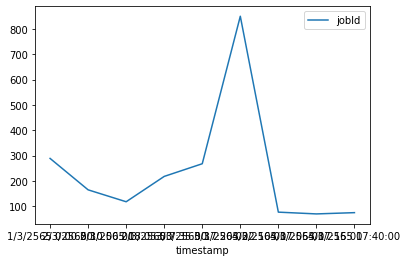

In [49]:
man44.plot.line(x = 'timestamp', y = 'jobId')

In [50]:
dfManyJob = dfManyJob.pivot(index='timestamp', columns='participantId', values='jobId')

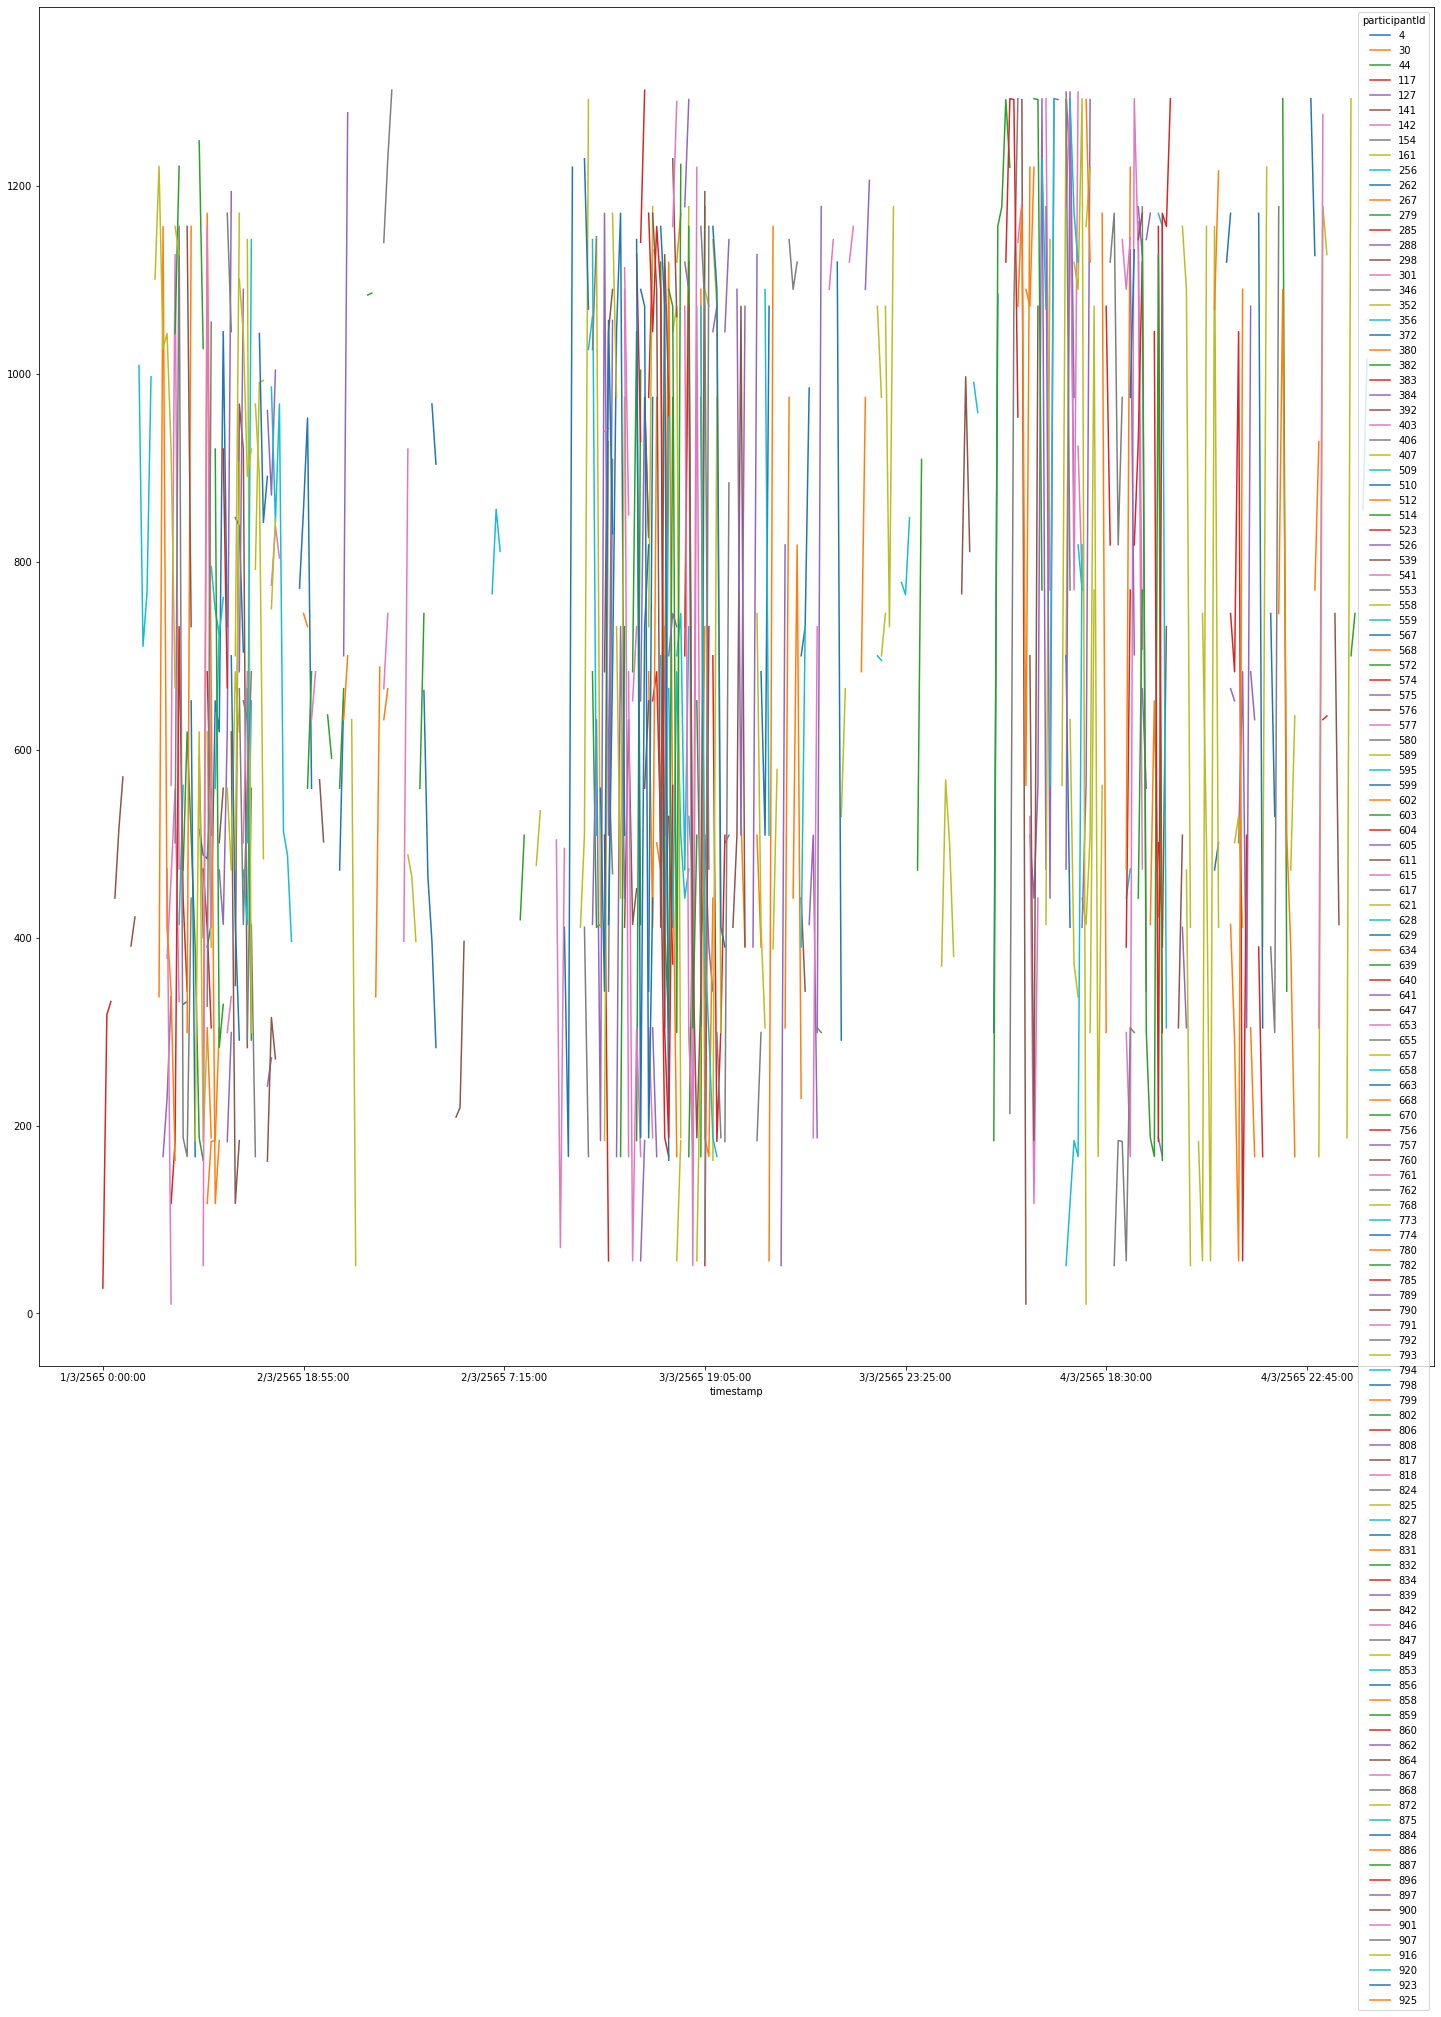

In [51]:
dfManyJob.plot(figsize=(25,25))
plt.show()

In [52]:
FirstTime = '1/3/2565 0:00:00'
LastTime = '6/3/2565  18:50:00'

In [53]:
"""for i in IdList:
    filename = "JobChanging\JobDetail" + str(i) + ".csv"
    dfName = "man" + str(i)
    #print(filename)
    dfName = dfManyJob[dfManyJob['participantId'] == i]
    LastJob = dfName['jobId'].iloc[-1]
    dfNameLastTime = dfName['timestamp'].iloc[-1]
    if(dfNameLastTime != LastTime):
        new_row = {'timestamp':LastTime, 'participantId':i, 'jobId':LastJob}
        dfName = dfName.append(new_row, ignore_index=True)
    dfName.to_csv(filename, index=False)
    #print("Job " + str(i)+ " complete")"""

'for i in IdList:\n    filename = "JobChanging\\JobDetail" + str(i) + ".csv"\n    dfName = "man" + str(i)\n    #print(filename)\n    dfName = dfManyJob[dfManyJob[\'participantId\'] == i]\n    LastJob = dfName[\'jobId\'].iloc[-1]\n    dfNameLastTime = dfName[\'timestamp\'].iloc[-1]\n    if(dfNameLastTime != LastTime):\n        new_row = {\'timestamp\':LastTime, \'participantId\':i, \'jobId\':LastJob}\n        dfName = dfName.append(new_row, ignore_index=True)\n    dfName.to_csv(filename, index=False)\n    #print("Job " + str(i)+ " complete")'

In [54]:
IdList
for i in IdList:
    filename = "JobDetail" + str(i)
    #print(filename)

In [55]:
"""i = 44
filename = "test123\JobDetail" + str(i) + ".csv"
dfName = "man" + str(i)
print(filename)
dfName = dfManyJob[dfManyJob['participantId'] == i]"""

'i = 44\nfilename = "test123\\JobDetail" + str(i) + ".csv"\ndfName = "man" + str(i)\nprint(filename)\ndfName = dfManyJob[dfManyJob[\'participantId\'] == i]'

In [56]:
#LastJob = dfName['jobId'].iloc[-1]
#LastJob

In [57]:
"""dfNameLastTime = dfName['timestamp'].iloc[-1]
dfNameLastTime
if(dfNameLastTime != LastTime):
    new_row = {'timestamp':LastTime, 'participantId':i, 'jobId':LastJob}
    dfName = dfName.append(new_row, ignore_index=True)
dfName"""

"dfNameLastTime = dfName['timestamp'].iloc[-1]\ndfNameLastTime\nif(dfNameLastTime != LastTime):\n    new_row = {'timestamp':LastTime, 'participantId':i, 'jobId':LastJob}\n    dfName = dfName.append(new_row, ignore_index=True)\ndfName"

In [58]:
#dfName.to_csv(filename, index=False)